##### 1. The Risk and Return | The Sharpe Ratio
* The Sharpe ratio was developed by William Sharpe and is used to calculate the return of an investment compared to its risk. It is calculated as follow:
    1. Subtract the risk-free rate from the return of the portfolio
    2. Divide the result by the standard deviation of the portfolio excess return
        * Note that the standard deviation shows how much the portfolio's return deviates from the expected return. It also shows the volatility of the portfolio. 
* In this study we calculate the Sharpe ratio for the stock of Facebook and Amazon. We used the S&P 500 as a benchmark of the 500 largest stocks in the US. However, we use stock index and not the risk-free rate, and stocks instead of portfolio to calculate the Sharpe ratio.

In [1]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data using read_csv method
fb_amazon = pd.read_csv('Fb_Amazon_S&P_Prices/stock_data.csv',
                        parse_dates=['Date'],
                        index_col='Date').dropna()
sp= pd.read_csv('Fb_Amazon_S&P_Prices/benchmark_data.csv',
                        parse_dates=['Date'],
                        index_col='Date').dropna()

##### 2. Explore Data

In [19]:
fb_amazon.info()
print(fb_amazon.head())
fb_amazon.info()
print(fb_amazon.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002


##### 3. Plot daily prices for Facebook and Amazon stocks & summarize their daily values

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


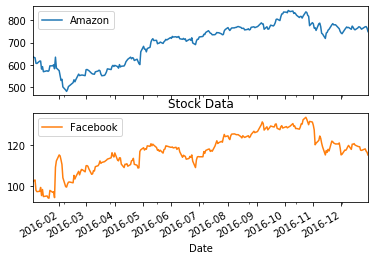

In [20]:
fb_amazon.plot(subplots=True)
plt.title('Stock Data')
fb_amazon.describe()

##### 4. Plot daily prices for S&P 500 and summarize their daily values

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


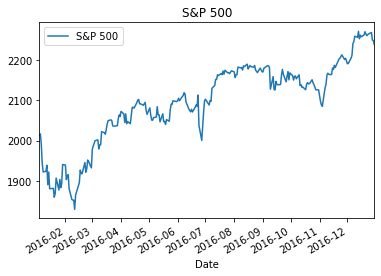

In [21]:
sp.plot()
plt.title('S&P 500')
sp.describe()

##### 5. Calculate daily returns of Facebook and Amazon's stocks
* To calculate the returns for FB and Amazon stock, we need to calculate the percent change in value from one day to the next. The pct_change() method will do this job. We also need to take a look at the daily summarize values because these are input variables.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


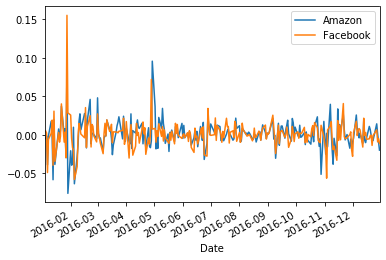

In [22]:
fb_amazon_returns = stock_data.pct_change()
fb_amazon_returns.plot()
fb_amazon_returns.describe()

##### 6. Calculate daily return of S&P 500 stocks

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

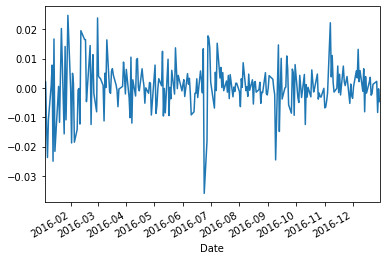

In [12]:
sp_returns = benchmark_data['S&P 500'].pct_change()
sp_returns.plot()
sp_returns.describe()

##### 7. Calculate daily Excess Returns for Facebook, Amazon vs. S&P 500

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


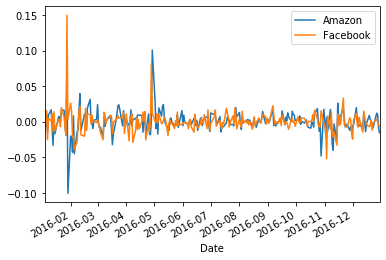

In [23]:
excess_returns = fb_amazon_returns.sub(sp_returns, axis=0)
excess_returns.plot()
excess_returns.describe()

##### 8. The Sharpe Ratio: 
        a. Calculate the differences in daily average returns of Facebook and Amazon stocks vs. S&P 500 stock
            * The daily average returns show the investment yields compared to the benchmark.

Text(0.5, 1.0, 'Mean of the Return Difference')

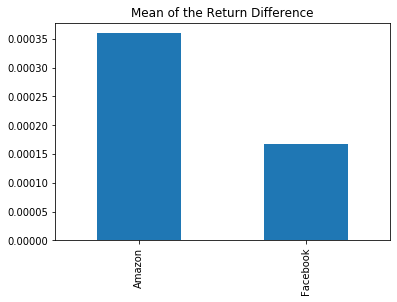

In [31]:
avg_excess_returns= excess_returns.mean()
avg_excess_returns.plot.bar()
plt.title('Mean of the Return Difference')

##### 9. The Sharpe Ratio:
        b. Calculate the standard deviation of the differences in excess return of Facebook & Amazon vs. S&P 500
            * The standard deviation shows us the amount of risk an investment in FB and Amazon stock vs. an investment in S&P 500

Text(0.5, 1.0, 'Standard Deviation of the Return Difference')

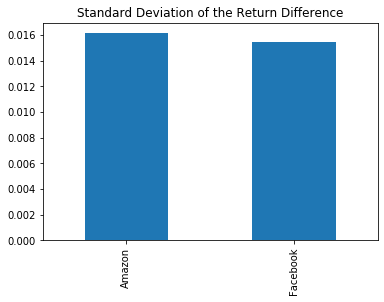

In [32]:
std_excess_returns = excess_returns.std()
std_excess_returns.plot.bar()
plt.title('Standard Deviation of the Return Difference')

##### 10. The Sharpe Ratio - The Final Results
    c. The Sharpe ratio is often calculate annually by multiplying it by the square root of days of investment by year, the number of days is 252 (5 days/week, 52 weeks, minus some holidays)
    * The results indicates how much an investment is gain or lost per unit of risk

Text(0.5, 1.0, 'Annualized Sharpe Ratio: Fabook and Amazon Vs. S&P 500')

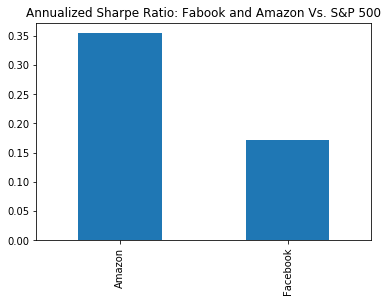

In [34]:
daily_sharpe_ratio = avg_excess_returns.div(std_excess_returns)
yearly_factor = np.sqrt(252)
yearly_sharpe_ratio= daily_sharpe_ratio.mul(yearly_factor)
yearly_sharpe_ratio.plot.bar()
plt.title('Annualized Sharpe Ratio: Fabook and Amazon Vs. S&P 500')

##### 11. Conclusion
* From the Sharpe ratios, we can conclude that an investment on Amazon stock will yield better profit ( twice as much). Now let examize the Sharpe ratio formula. The denominator-the standard deviation, which indicates the risk of choosing Amazon over Facebook, was slightly higher than Facebook, but the numerator-the average daily return was double for Amazon compared to Facebook.
* After our analysis, shoud you buy Amazon stock or Facebook stock?